     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.9/315.9 kB 9.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 41.3 MB/s eta 0:00:00a 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.0/73.0 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 22.8 MB/s eta 0:00:0000:0100:01
  Created wheel for frozendict: filename=frozendict-2.4.4-cp38-cp38-macosx_10_9_x86_64.whl size=37802 sha256=1725e62a734324a35d146e7e83bf181fb8776f0d2f460b2411e9d9dd3106aa85
  Stored in directory: /Users/rishikesanravichandran/Library/Caches/pip/wheels/7d/65/20/a8f7d1a2a99c9db2dfb0f83dddac9e847b02f45040768bf264
  

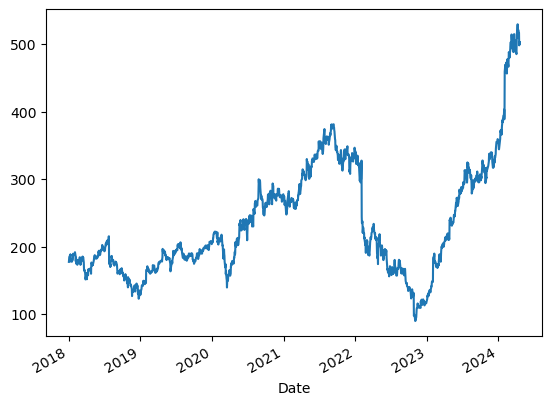

In [50]:
!pip install yfinance
import yfinance as yf
tickerSymbol = 'META'
#get data on this ticker
tickerData = yf.Ticker(tickerSymbol)
#get the historical prices for this ticker
df = tickerData.history(period='1d', start='2018-1-1', end='2024-4-22')
#see your data
df['Open'].plot()
plt.show()

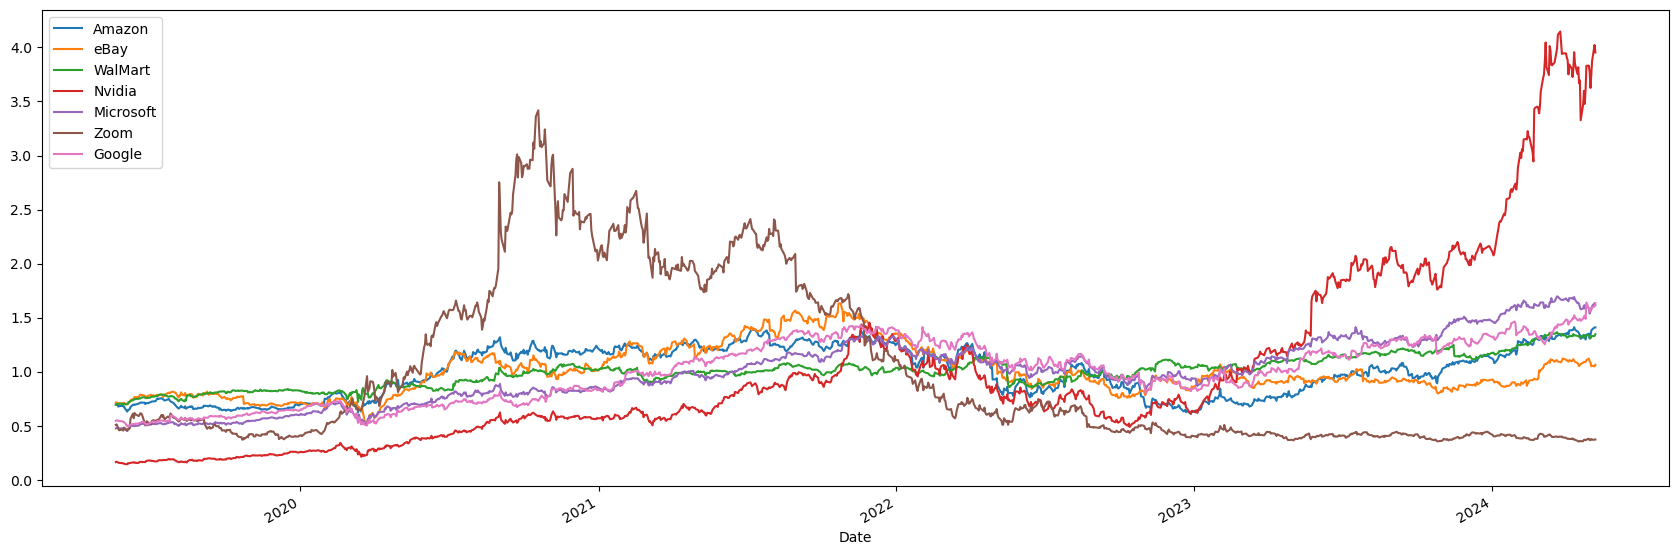

In [76]:
Start='2019-5-20'
End='2024-5-8'
amazon = yf.Ticker('AMZN').history(period='1d', start=Start, end=End)['Close']
ebay=yf.Ticker('EBAY').history(period='1d', start=Start, end=End)['Close']
WalMart=yf.Ticker('WMT').history(period='1d', start=Start, end=End)['Close']
nvidia=yf.Ticker('NVDA').history(period='1d', start=Start, end=End)['Close']
microsoft=yf.Ticker('MSFT').history(period='1d', start=Start, end=End)['Close']
zoom=yf.Ticker('ZM').history(period='1d', start=Start, end=End)['Close']
google=yf.Ticker('GOOGL').history(period='1d', start=Start, end=End)['Close']

data=[amazon,ebay,WalMart,nvidia,microsoft,zoom,google]
plt.figure(figsize=(21,7))
(data[0]/np.mean(data[0])).plot()
(data[1]/np.mean(data[1])).plot()
(data[2]/np.mean(data[2])).plot()
(data[3]/np.mean(data[3])).plot()
(data[4]/np.mean(data[4])).plot()
(data[5]/np.mean(data[5])).plot()
(data[6]/np.mean(data[6])).plot()
plt.legend(['Amazon', 'eBay','WalMart','Nvidia','Microsoft','Zoom','Google'])
plt.show()

In [77]:
import yfinance as yf
import pandas as pd
import numpy as np

# Define the date range
start = '2019-5-20'
end = '2024-5-8'

# Define the stock symbols
symbols = ['AMZN', 'EBAY', 'WMT', 'NVDA', 'MSFT', 'ZM', 'GOOGL']

# Retrieve historical closing prices
data = pd.concat(
    [yf.Ticker(symbol).history(period='1d', start=start, end=end)['Close'].rename(symbol) for symbol in symbols],
    axis=1
)

# Calculate returns
returns = data.pct_change().dropna()

# Calculate geometric mean return
geometric_mean_returns = ((1 + returns).prod())**(1/returns.shape[0]) - 1

# Calculate covariance matrix of returns
covariance_matrix = returns.cov()

print("Geometric Mean Returns:")
print(geometric_mean_returns)
print("\nCovariance Matrix of Returns:")
print(covariance_matrix)


Geometric Mean Returns:
AMZN     0.000567
EBAY     0.000319
WMT      0.000527
NVDA     0.002547
MSFT     0.000978
ZM      -0.000247
GOOGL    0.000877
dtype: float64

Covariance Matrix of Returns:
           AMZN      EBAY       WMT      NVDA      MSFT        ZM     GOOGL
AMZN   0.000493  0.000205  0.000094  0.000441  0.000292  0.000327  0.000293
EBAY   0.000205  0.000425  0.000085  0.000282  0.000181  0.000206  0.000167
WMT    0.000094  0.000085  0.000193  0.000126  0.000106  0.000068  0.000088
NVDA   0.000441  0.000282  0.000126  0.001083  0.000445  0.000439  0.000412
MSFT   0.000292  0.000181  0.000106  0.000445  0.000368  0.000220  0.000294
ZM     0.000327  0.000206  0.000068  0.000439  0.000220  0.001413  0.000214
GOOGL  0.000293  0.000167  0.000088  0.000412  0.000294  0.000214  0.000412


In [78]:
matrix(geometric_mean_returns.values.tolist())

matrix([[ 0.00056691,  0.00031864,  0.00052721,  0.00254676,  0.00097818,
         -0.00024747,  0.00087718]])

In [94]:
from pandas import DataFrame
from scipy import stats
##Compute mu and variance-covariance matrix with the new data
## Optimize your portfolio

R=0.10/250 #Daily return, i.e., 15% over the year, with 250 trading days
mu=matrix(geometric_mean_returns.values)
Cov=matrix(covariance_matrix.values)
x=cvx.Variable(7)
risk=quad_form(x, Cov)#create x'\Sigma x, the risk of the portfolio, where \Sigma is the variance-covariance matrix of returns (Cov above)
rr=sum(mu@x)#create \mu' x
prob1 = Problem(Minimize(risk ),
               [rr>=R,sum(x) == 1,
                x >= 0])
prob1.solve()
print(symbols)
print(x.value)

result = pd.DataFrame({"Stock":symbols,"Portfolio":x.value})
result

['AMZN', 'EBAY', 'WMT', 'NVDA', 'MSFT', 'ZM', 'GOOGL']
[1.51006199e-02 1.50640901e-01 6.44508408e-01 3.04391899e-18
 2.89829656e-02 2.93896020e-02 1.31377503e-01]


,Stock,Portfolio
0,AMZN,1.510062e-02
1,EBAY,1.506409e-01
2,WMT,6.445084e-01
3,NVDA,3.043919e-18
4,MSFT,2.898297e-02
5,ZM,2.938960e-02
6,GOOGL,1.313775e-01


In [92]:
mu.flatten()

mu = [0.00056691,0.00031864,0.00052721,0.00254676,0.00097818,-0.00024747,0.00087718]

,final
count,100.000000
mean,848.938381
std,219.431441
min,499.200699
25%,694.953549
50%,817.634627
75%,990.561697
max,1559.699983


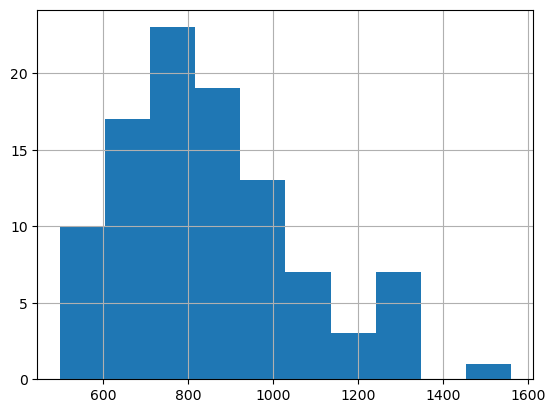

In [90]:
T = 250 # number of trading days

m=7
y = np.zeros((T+1,m))

paths = []
for sim in range(100):
    y = np.zeros((T+1,m))
    y[0]=[100,100,100,100,100,100,100]
    for i in range(T):
        rr=np.random.multivariate_normal(mu,Cov)
        y[i+1]=y[i]*(1+rr)
    data=np.array(y)
    total_returns = data[[-1]].sum()
    paths.append(total_returns)

import pandas as pd

df = pd.DataFrame({"final":paths})
df['final'].hist()

df.describe()
